# Machine Learning: Session 3

In [1]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
CRED = '\033[91m'
CEND = '\033[0m'

## Task 1. Different distance measures in KNN (1 point)

The goal of this task is to understand better how different distance measures can affect the KNN performance. In addition, we are going to test the effect of normalizing input features and using weighted averaging for the nearest neighbours.

**(a)** Load the "wine" dataset from sklearn datasets, put input features into pandas dataframe and name the columns with feature names. <br>
Report the number of features and the number of classes in the dataset.

In [2]:
#Load dataset
wine = datasets.load_wine()
#HINTS:
#wine.data contains numpy array of dataset input features
#wine.target contains labels of instances
#wine.feature_names contains features labels

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    wine_train = pd.DataFrame(data = wine.data, columns = wine.feature_names)
    wine_train['target'] = wine.target
    display(wine_train.head())
    num_features = len(wine.feature_names)
    num_classes = len(np.unique(wine.target))
    print("Number of features: ", num_features)
    print("Number of classes: ", num_classes)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Number of features:  13
Number of classes:  3


**<font color='purple'>Answer to (a):</font>**
Number of features:  13
Number of classes:  3

**(b)** Split the dataset into 80% training data and 20% test data using random seed = 22, and report the number of instances in the training set and in the test set.

In [3]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    X = wine.data
    y = wine.target
    seed = 22
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape, "X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)
    print(f"Number of instances in the training set: {X_train.shape[0]}")
    print(f"Number of instances in the test set: {X_test.shape[0]}")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

X_train shape:  (142, 13) y_train shape:  (142,) X_test shape:  (36, 13) y_test shape:  (36,)
Number of instances in the training set: 142
Number of instances in the test set: 36


**<font color='purple'>Answer to (b):</font>**
Number of instances in the training set: 142
Number of instances in the test set: 36

**(c)** Use the KNN Classifier from Sklearn to fit a model for different values of K (3, 5, 7). Report test accuracy for each K. Report the best K to be used on this dataset.

In [4]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    k_values = [3,5,7]
    best_k = None
    best_accuracy = 0
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for k={k}: {accuracy*100:.2f}%")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Accuracy for k=3: 66.67%
Accuracy for k=5: 69.44%
Accuracy for k=7: 66.67%


**<font color='purple'>Answer to (c):</font>**

Accuracy for k=3: 66.67%
Accuracy for k=5: 69.44%
Accuracy for k=7: 66.67%

**Best K: 5**

**(d)** Use the best value of K from the previous subtask, and try changing the distance metric used by KNN into euclidean, manhattan, chebyshev and minkowski with P = 3. Report the accuracy obtained with each metric. Report the best metric to be used on this dataset.

In [5]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
    best_metric = None
    best_accuracy = 0
    best_k = 5
    p = 3
    for metric in distance_metrics:
        if metric == 'minkowski':
            knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric, p=p)
        else:
            knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for metric={metric}: {accuracy*100:.2f}%")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_metric = metric
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Accuracy for metric=euclidean: 69.44%
Accuracy for metric=manhattan: 72.22%
Accuracy for metric=chebyshev: 66.67%
Accuracy for metric=minkowski: 69.44%


**<font color='purple'>Answer to (d):</font>**
Accuracy for metric=euclidean: 69.44%
Accuracy for metric=manhattan: 72.22%
Accuracy for metric=chebyshev: 66.67%
Accuracy for metric=minkowski: 69.44%

**Best metric: manhattan**

**(e)** Try to use weights for nearest neighbors according to the inverse of their distance from the test instance. Use the best K found in **(c)** and the best distance metric found in **(d)**. Report the accuracy and discuss whether it is better to use weights or not. (Hint: Read about `weights` parameter from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">HERE</a>)

In [6]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    best_k = 5
    best_metric = 'manhattan'
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={best_k}, metric={best_metric}, weights=distance: {accuracy*100:.2f}%")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Accuracy for k=5, metric=manhattan, weights=distance: 80.56%


**<font color='purple'>Answer to (e):</font>**
- The default setting in KNN is weights='uniform', which means all neighbors contribute equally, regardless of their distance from the test instance.
- Using weights='distance' means that closer neighbors have a higher influence on the classification decision compared to those farther away.

*Accuracy for k=5, metric=manhattan, weights=distance: 80.56%*

**(f)** Standardize the features in the whole dataset by subtracting the mean and dividing by standard deviation from each feature (The mean and standard deviation should be calculated from the training instances only). Predict the accuracy using best parameters found in **(c)**, **(d)**, and **(e)**. Is it better to standardize / normalize your features before using KNN? WHY?

In [7]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    scaler = preprocessing.StandardScaler()
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.transform(X_test)
    best_k = 5
    best_metric = 'manhattan'
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric, weights='distance')
    knn.fit(X_train_standardized, y_train)
    y_pred = knn.predict(X_test_standardized)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={best_k}, metric={best_metric}, weights=distance after standardization: {accuracy*100:.2f}%")
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Accuracy for k=5, metric=manhattan, weights=distance after standardization: 94.44%


**<font color='purple'>Answer to (f):</font>**
**yes**

**Accuracy Before Standardization:**
- The accuracy for k=5 with the manhattan distance metric and weights='distance' was previously reported as 80.56%.

**Accuracy After Standardization:**
- After standardizing the features, the accuracy increased significantly to 94.44%.

**Why Standardization is Important:**
- KNN uses distance-based calculations to identify neighbors. When **features are not on the same scale**, the algorithm can give undue importance to certain features.

- Standardization mitigates this issue by ensuring all features have a mean of 0 and a standard deviation of 1, **making them comparable in scale.**

**(g)** Based on your observations during this task, write out what have you learnt so far when using the KNN learning algorithm.

**<font color='purple'>Answer to (g):</font>**

**Choosing K:**

- Choosing the right value of K is crucial for the performance of the KNN model.

**Distance Metrics:**

- Different metrics yield different results; experimenting is essential.

**Weights:**

- Using weights='distance' often improves accuracy by giving more influence to closer neighbors.

**Feature Standardization:**
- Standardizing features ensures all contribute equally to the distance metric, which significantly boosts performance (accuracy increased from 80.56% to 94.44% after standardization).

**Data Sensitivity:**
- KNN is sensitive to scales and units of features, so normalization or standardization is crucial for best results.

## Task 2. Linear and polynomial kernels in SVM (2 points)

The goal of this task is to understand better how the choice of kernel and parameter values affect the performance of SVM. You are given a two-dimensional dataset with a binary label and two features: $x_1$ and $x_2$. Your class labels are generated from the features using the XOR function, such that the class is positive when either $x_1 > 0$ or $x_2 > 0$ but not both. The following code creates this dataset and plots it.

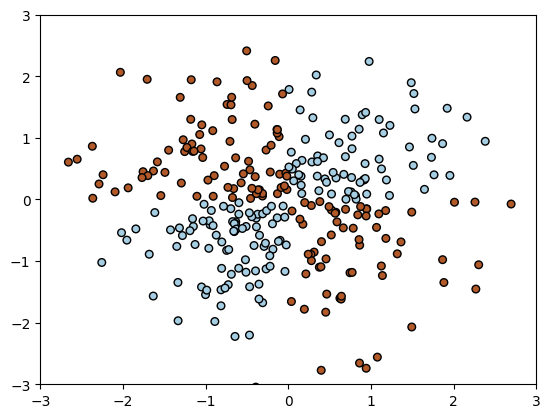

In [8]:
train_X = np.random.randn(300, 2)
train_Y = np.logical_xor(train_X[:, 0] > 0, train_X[:, 1] > 0)

plt.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.axis([-3, 3, -3, 3])
plt.show()

- **(a)** Let's first learn SVM with the linear kernel. Please fill in the 2 gaps in the code.

In [9]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # fit the model here:
    svm_model = svm.SVC(kernel='linear')
    svm_model.fit(train_X, train_Y)
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

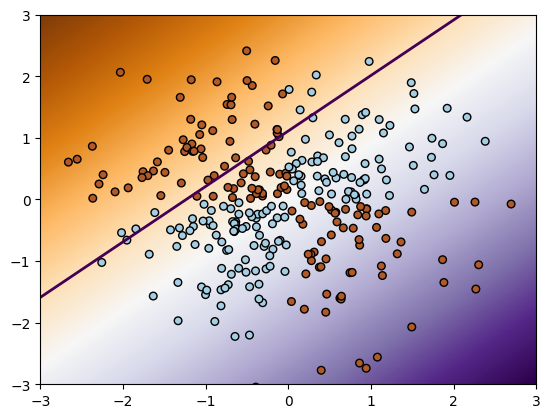

In [10]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

def plot_svm(model, X, Y, ax = None):
    # plots the decision function for each datapoint on the grid
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
                   origin='lower', cmap=plt.cm.PuOr_r)
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
        plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        plt.axis([-3, 3, -3, 3])
        plt.show()
    else:
        ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        ax.axis([-3, 3, -3, 3])

try:
    plot_svm(svm_model, train_X, train_Y)
except Exception as e:
    print("Exception:", e)

- **(b)** Can SVM with the linear kernel separate these data? 

**<font color='purple'>Answer to (b):</font>**
**No**, SVM with a linear kernel cannot effectively separate these data is not linearly separable.



- **(c)** Now learn the SVM model with the polynomial kernel of degree 2 and degree 3. Which of them is able to learn the XOR function (not perfectly but reasonably well)?

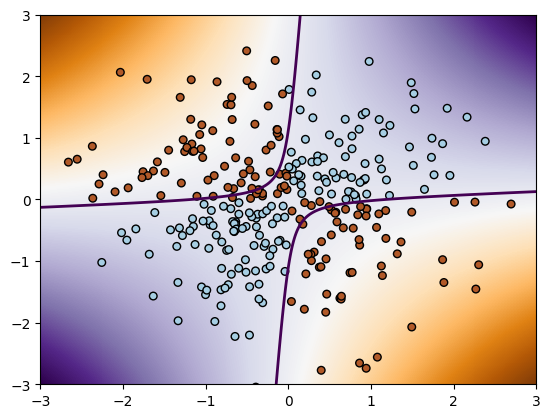

Accuracy for polynomial kernel with degree 2: 93.33%


In [11]:
try:
    #### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Degree 2
    svm_poly_model_2 = svm.SVC(kernel='poly', degree=2)
    svm_poly_model_2.fit(train_X, train_Y)
    plot_svm(svm_poly_model_2, train_X, train_Y)
    accuracy = svm_poly_model_2.score(train_X, train_Y)
    print(f"Accuracy for polynomial kernel with degree 2: {accuracy*100:.2f}%")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

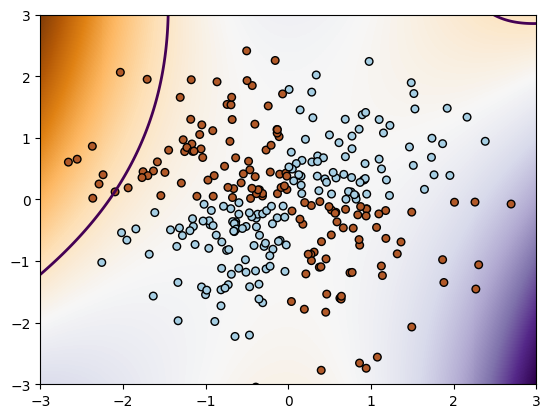

Accuracy for polynomial kernel with degree 3: 55.33%


In [12]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Degree 3
    svm_poly_model_3 = svm.SVC(kernel='poly', degree=3)
    svm_poly_model_3.fit(train_X, train_Y)
    plot_svm(svm_poly_model_3, train_X, train_Y)
    accuracy = svm_poly_model_3.score(train_X, train_Y)
    print(f"Accuracy for polynomial kernel with degree 3: {accuracy*100:.2f}%")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (c):</font>**
as shown in the plots, the polynomial kernel of **degree 2** is able to learn the XOR function reasonably well.

- **(d)** Let us try to understand the reason why one degree worked well and the other not. Which of the following features is the most useful in discriminating the two classes: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1^3$, $x_2^3$, $x_1 x_2$, $x_1^2 x_2$, $x_2^2 x_1$? (Hint: If you cannot guess the right answer then you could visualize these as a surface, example code for $x_2^2 x_1$ is shown below where lighter colour is a hill and darker is valley)

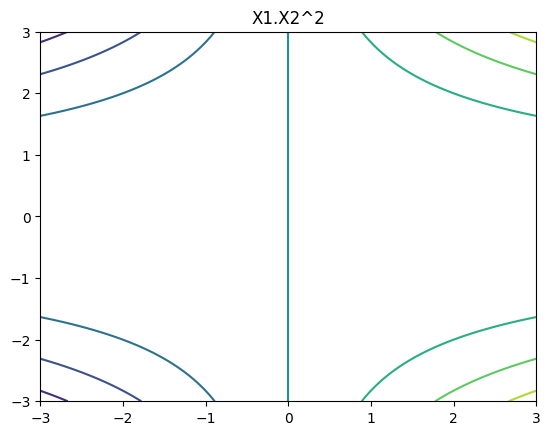

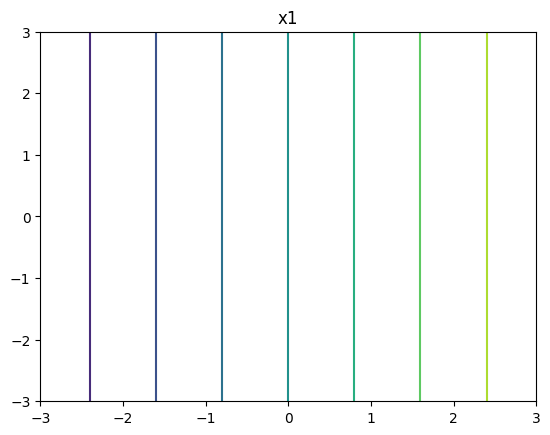

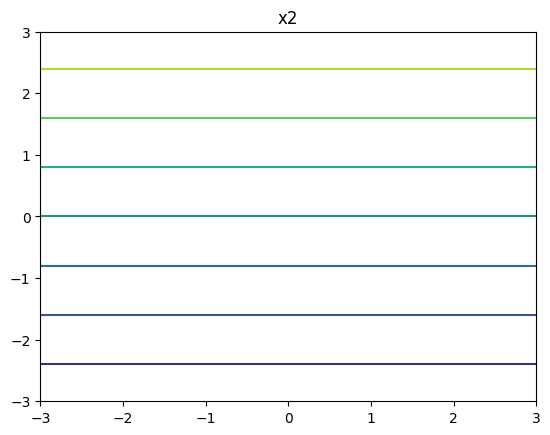

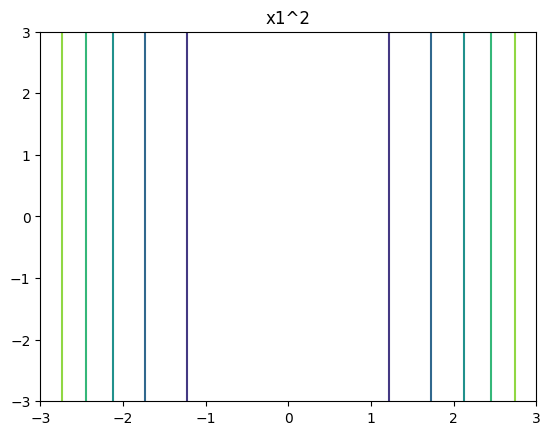

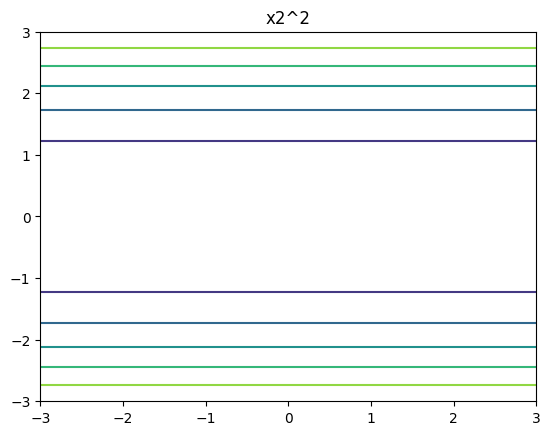

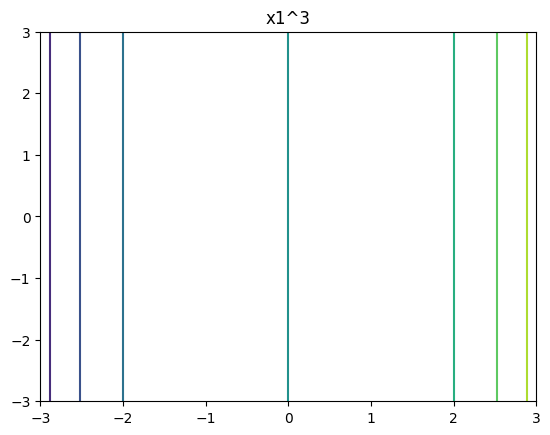

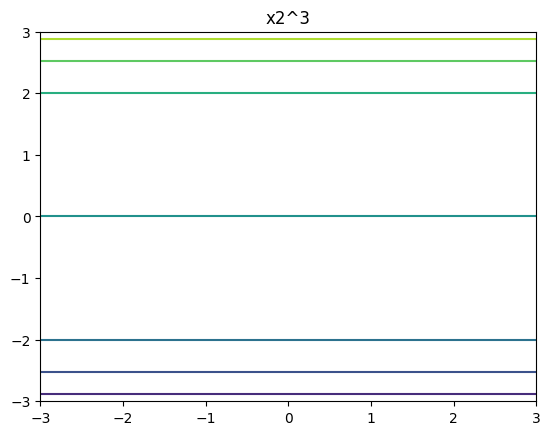

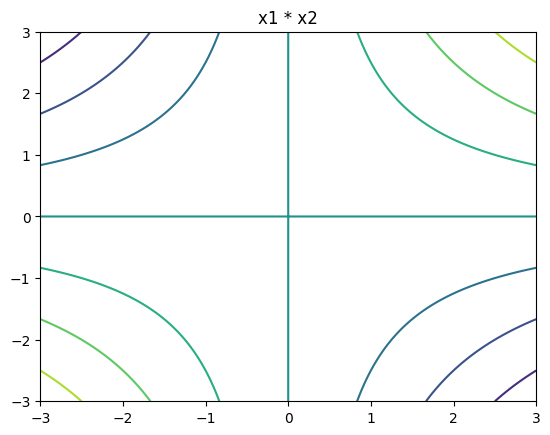

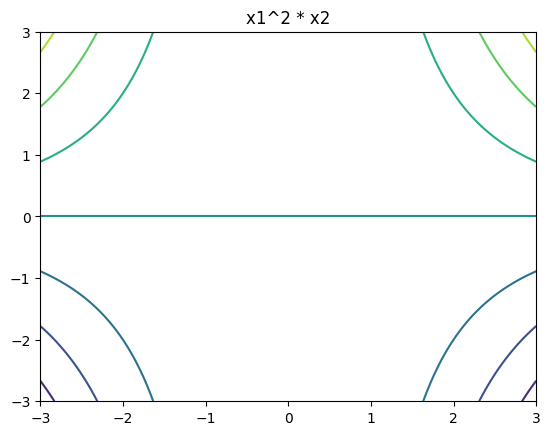

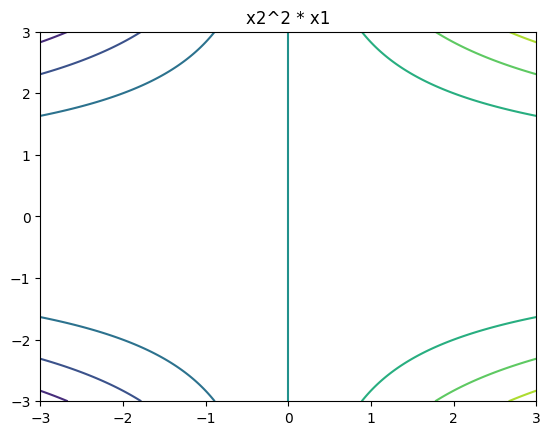

In [13]:
plt.contour(xx, yy, yy*yy*xx)
plt.title('X1.X2^2')
plt.show()
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Visualize rest of the features similarly as above
    # Visualize x1
    plt.contour(xx, yy, xx)
    plt.title('x1')
    plt.show()
    
    # Visualize x2
    plt.contour(xx, yy, yy)
    plt.title('x2')
    plt.show()

    # Visualize x1^2
    plt.contour(xx, yy, xx ** 2)
    plt.title('x1^2')
    plt.show()
    
    # Visualize x2^2
    plt.contour(xx, yy, yy ** 2)
    plt.title('x2^2')
    plt.show()

    # Visualize x1^3
    plt.contour(xx, yy, xx ** 3)
    plt.title('x1^3')
    plt.show()
    
    # Visualize x2^3
    plt.contour(xx, yy, yy ** 3)
    plt.title('x2^3')
    plt.show()

    # Visualize x1 * x2
    plt.contour(xx, yy, xx * yy)
    plt.title('x1 * x2')
    plt.show()
    
    # Visualize x1^2 * x2
    plt.contour(xx, yy, (xx ** 2) * yy)
    plt.title('x1^2 * x2')
    plt.show()
    
    # Visualize x2^2 * x1
    plt.contour(xx, yy, (yy ** 2) * xx)
    plt.title('x2^2 * x1')
    plt.show()

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (d):</font>**


- **(e)** Expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^2$ (open the brackets) where $\mathbf{x}=(x_1,x_2)$ and $\mathbf{z}=(z_1,z_2)$. **<font color='purple'>For this please modify the following code for your purpose:</font>** Hint: we did this in the practice session, but you can follow a similar example at page 51 of Lecture 05.

In [14]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # #Example
    # a, b = sp.symbols('a_1 b_2')
    # sp.expand( (a + b)**2 )
    x1,x2,z1,z2 = sp.symbols('x1 x2 z1 z2')
    dot = (x1*z1 + x2*z2)
    k= sp.expand(dot**2)
    print("expansion of (x1*z1 + x2*z2)^2: ", k)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

expansion of (x1*z1 + x2*z2)^2:  x1**2*z1**2 + 2*x1*x2*z1*z2 + x2**2*z2**2


- **(f)** Please now list all features that are included in the constructed feature space $\phi(\mathbf{x})$ corresponding to the kernel $\kappa(\mathbf{x},\mathbf{z})=(\mathbf{x}\cdot\mathbf{z})^2$. Hint: You can read this out from your answer to **(e)** because $\kappa(\mathbf{x},\mathbf{z})=\phi(\mathbf{x})\cdot\phi(\mathbf{z})$.

**<font color='purple'>Answer to (f):</font>**
$\phi(x)=(x1**2*z1**2 + 2*x1*x2*z1*z2 + x2**2*z2**2)$

- **(g)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(f)**? Does this explain why polynomial kernel with degree 2 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (g):</font>**
Yes, This explains why the polynomial kernel of degree 2 performed well: it includes the necessary interaction term to separate the XOR data effectively.

The polynomial kernel of degree 3 introduced additional, unnecessary complexity, which reduced its performance on this particular problem.

- **(h)** Please now expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^3$ similarly to subtask **(e)** and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel, as in subtask **(f)**. 

In [15]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    x1,x2,z1,z2 = sp.symbols('x1 x2 z1 z2')
    dot = (x1*z1 + x2*z2)
    k= sp.expand(dot**3)
    print("expansion of (x1*z1 + x2*z2)^3: ", k)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

expansion of (x1*z1 + x2*z2)^3:  x1**3*z1**3 + 3*x1**2*x2*z1**2*z2 + 3*x1*x2**2*z1*z2**2 + x2**3*z2**3


**<font color='purple'>Answer to (h):</font>**
$\phi(x)=(x1**3*z1**3 + 3*x1**2*x2*z1**2*z2 + 3*x1*x2**2*z1*z2**2 + x2**3*z2**3)$

- **(i)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(h)**? Does this explain why polynomial kernel with degree 3 performed well / not well in subtask **(c)**? 


**<font color='purple'>Answer to (i):</font>**


The best discriminator from subtask (d), 
​
is not directly present in the feature space constructed by the degree 3 polynomial kernel. This absence, coupled with the presence of overly complex higher-order terms, explains why the polynomial kernel of degree 3 performed poorly on the XOR problem.

- **(j)** The polynomial kernel is actually defined by $\kappa(\mathbf{x},\mathbf{z}) = (\mathbf{x}\cdot\mathbf{z}+r)^d$, but by default this r is 0. Take $r = 1$ and $d = 3$ and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel. Is the necessary feature present now?

In [16]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    x1,x2,z1,z2 = sp.symbols('x1 x2 z1 z2')
    dot = (x1*z1 + x2*z2)
    r=1
    d=3
    polynomial_kernel = (dot + r)**d
    k= sp.expand(polynomial_kernel)
    print("Expanded form of (x · z + 1)^3: ", k)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Expanded form of (x · z + 1)^3:  x1**3*z1**3 + 3*x1**2*x2*z1**2*z2 + 3*x1**2*z1**2 + 3*x1*x2**2*z1*z2**2 + 6*x1*x2*z1*z2 + 3*x1*z1 + x2**3*z2**3 + 3*x2**2*z2**2 + 3*x2*z2 + 1


**<font color='purple'>Answer to (j):</font>**
x1**3*z1**3 + 3*x1**2*x2*z1**2*z2 + 3*x1**2*z1**2 + 3*x1*x2**2*z1*z2**2 + 6*x1*x2*z1*z2 + 3*x1*z1 + x2**3*z2**3 + 3*x2**2*z2**2 + 3*x2*z2 + 1

- **(k)** The value $r$ is represented by parameter 'coef0' in the SVC function. Change it to 1 and see if you can now learn XOR with polynomial kernel of degree 3. Make the resulting plot and report if learning of XOR succeeded.

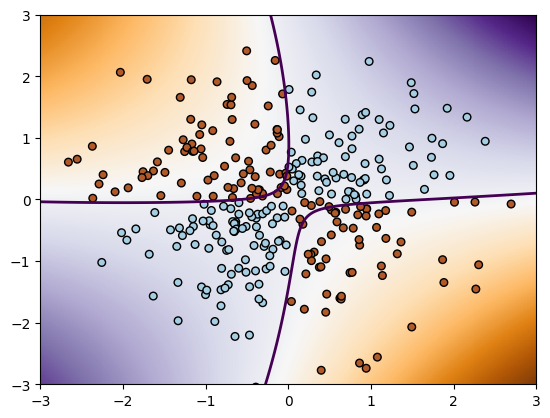

Accuracy for polynomial kernel with degree 3 and coef0=1: 96.33%


In [17]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    svm_poly_coef0 = svm.SVC(kernel='poly', degree=3, coef0=1)
    svm_poly_coef0.fit(train_X, train_Y)
    plot_svm(svm_poly_coef0, train_X, train_Y)
    accuracy = svm_poly_coef0.score(train_X, train_Y)
    print(f"Accuracy for polynomial kernel with degree 3 and coef0=1: {accuracy*100:.2f}%")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (k):</font>**
The learning of XOR succeeded with a polynomial kernel of degree 3 and coef0=1

## Task 3: Gaussian kernel in SVM (1 point)

- **(a)** Make __6__ plots and show how RBF kernel works with different C values: 0.1, 0.5, 1, 2, 10, 100. What do you observe? What does parameter C do? 

    - Hint 1: Remember the soft-margin SVM formula and check out what the C parameter stood for. 
    - Hint 2: Use `plt.subplots(2, 3, figsize=...)` to arrange them nicely and `plot_svm(svm_model, train_X, train_Y, ax=ax[i][j])` to plot to the subplot in row i and column j. 
    - Hint 3: Make sure you run `plt.show()` after the plotting.

Accuracy for rbf kernel with C=0.1: 87.67%
Accuracy for rbf kernel with C=0.5: 95.67%
Accuracy for rbf kernel with C=1: 97.33%
Accuracy for rbf kernel with C=2: 97.67%
Accuracy for rbf kernel with C=10: 99.33%
Accuracy for rbf kernel with C=100: 99.67%


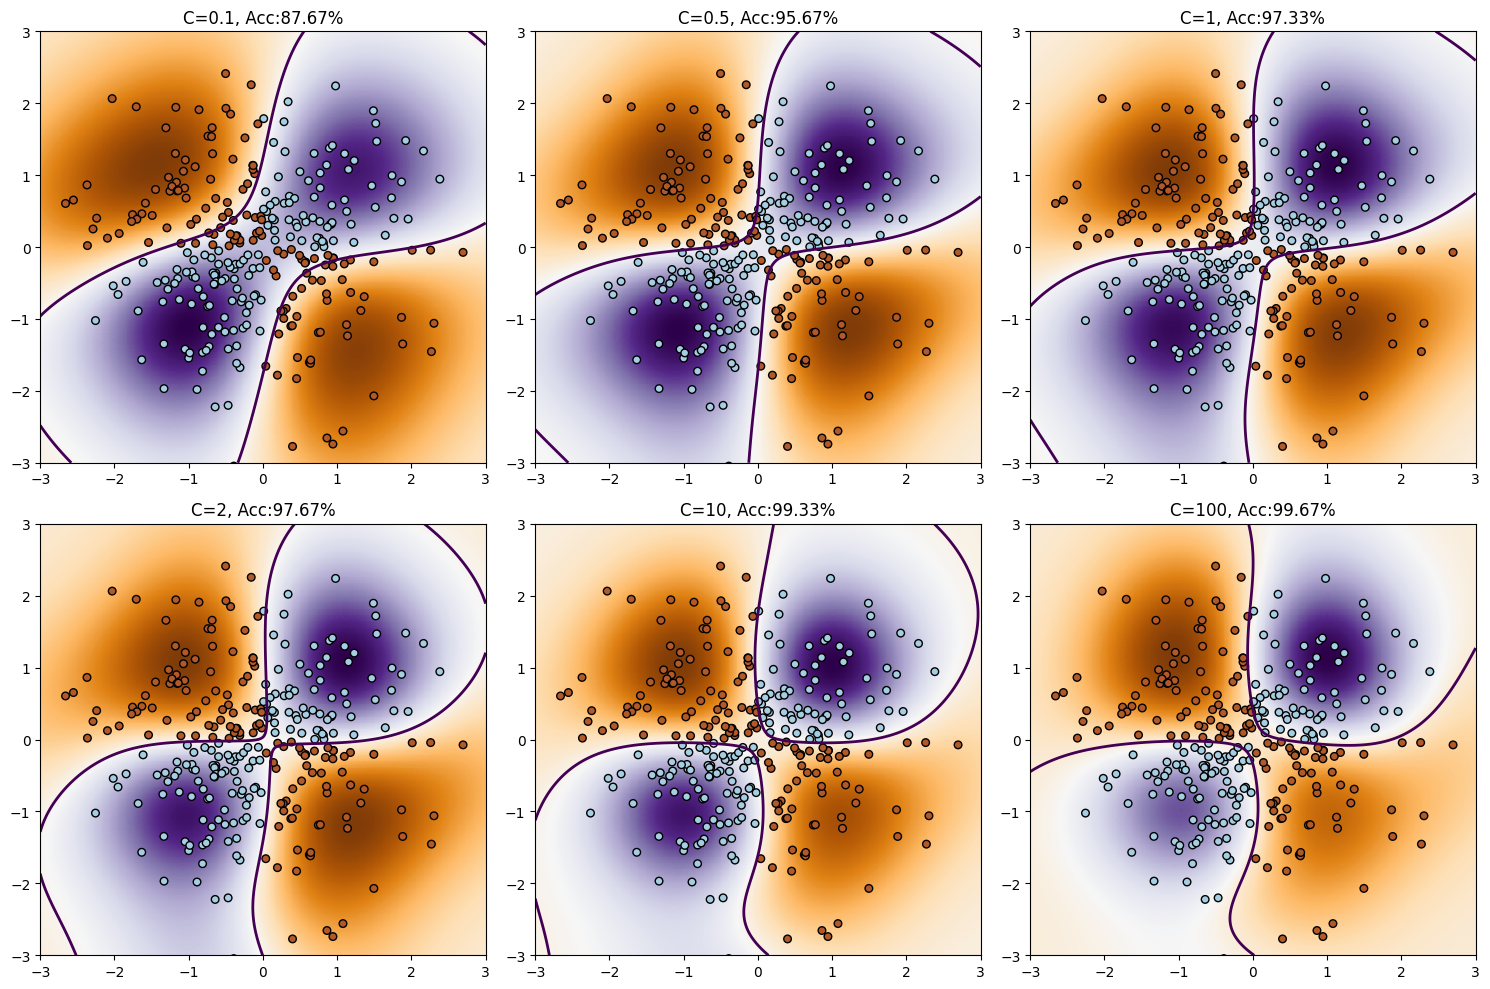

In [18]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    c_values = [0.1, 0.5,1,2,10,100]
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
    for i, c in enumerate(c_values):
        svm_poly_c = svm.SVC(kernel='rbf', C=c)
        svm_poly_c.fit(train_X, train_Y)
        plot_svm(svm_poly_c, train_X, train_Y, ax[i//3, i%3])
        accuracy = svm_poly_c.score(train_X, train_Y)
        print(f"Accuracy for rbf kernel with C={c}: {accuracy*100:.2f}%")
        ax[i//3, i%3].set_title(f"C={c}, Acc:{accuracy*100:.2f}%")
    plt.tight_layout()
    plt.show()
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (a):</font>**
**Effect of C Parameter:**
- Low C values (e.g., 0.1): The decision boundary is smoother and more tolerant to misclassifications, resulting in lower accuracy.
- Higher C values (e.g., 10, 100): The model fits the data more tightly, creating more complex boundaries and leading to higher accuracy but potentially overfitting.

increasing C results in better accuracy on the training data but could lead to overfitting if set too high.

- **(b)** Now change the gamma parameter: 0.01, 0.5, 1, 2, 10, 100 and do the same as in the subtask **(a)**. What does the gamma parameter do? (Hint: check out the Gaussian kernel formula and rememeber that $\gamma = \frac{1}{2\sigma}$).

Accuracy for rbf kernel with gamma=0.01: 55.00%
Accuracy for rbf kernel with gamma=0.5: 97.33%
Accuracy for rbf kernel with gamma=1: 98.33%
Accuracy for rbf kernel with gamma=2: 98.67%
Accuracy for rbf kernel with gamma=10: 100.00%
Accuracy for rbf kernel with gamma=100: 100.00%


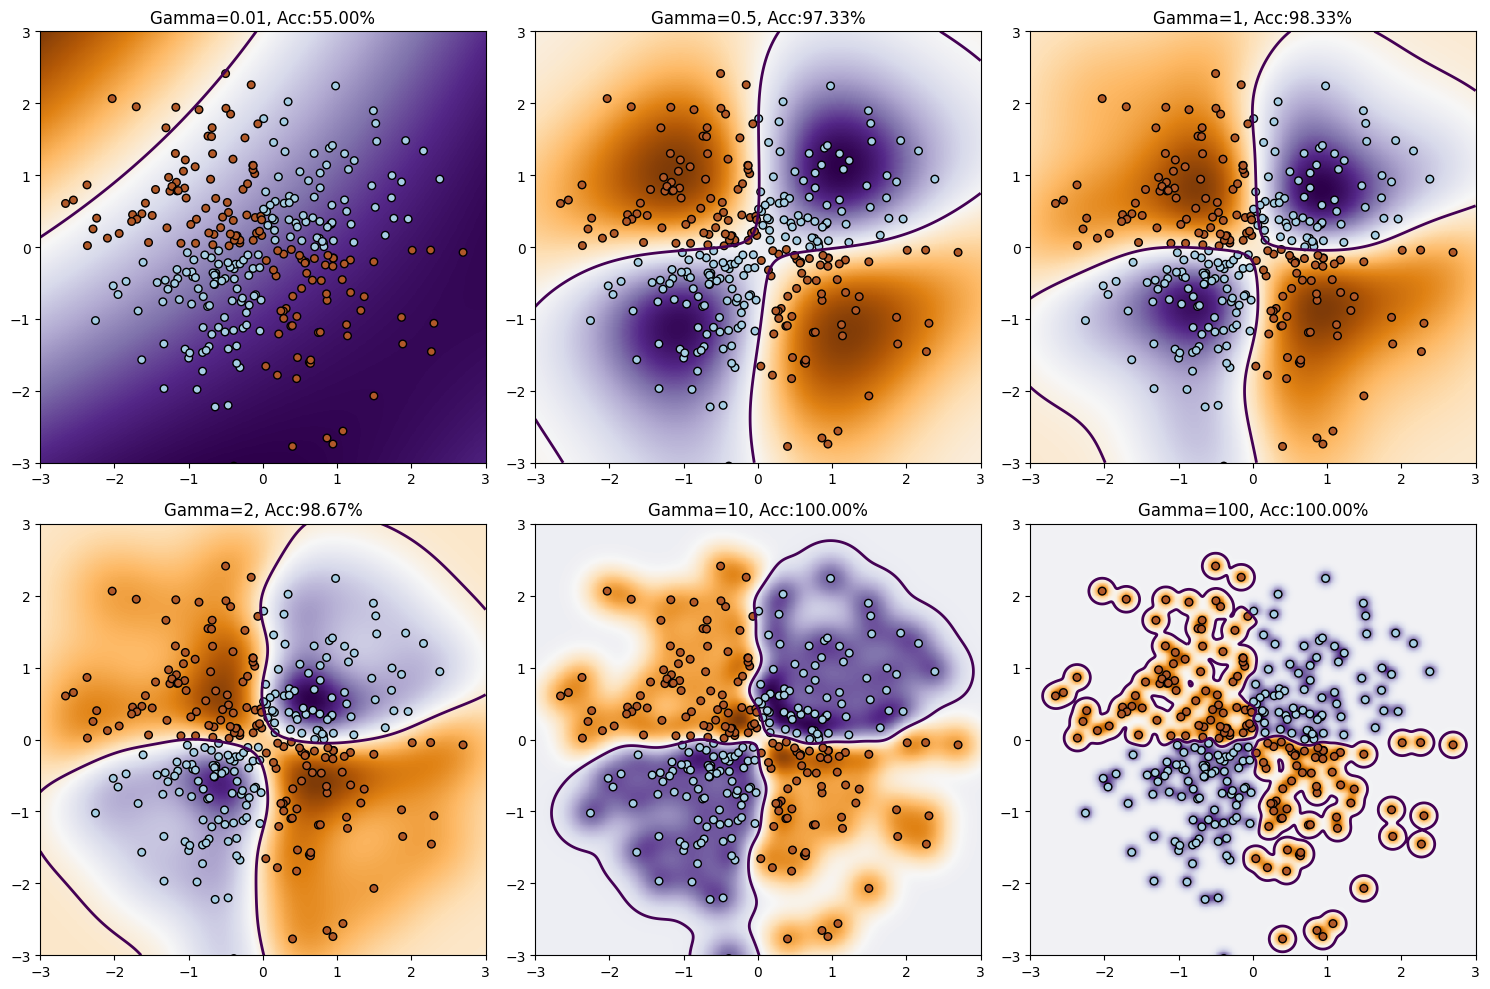

In [19]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    gamma_values = [0.01, 0.5,1,2,10,100]
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
    for i, gamma in enumerate(gamma_values):
        svm_poly_gamma = svm.SVC(kernel='rbf', gamma=gamma)
        svm_poly_gamma.fit(train_X, train_Y)
        plot_svm(svm_poly_gamma, train_X, train_Y, ax[i//3, i%3])
        accuracy = svm_poly_gamma.score(train_X, train_Y)
        print(f"Accuracy for rbf kernel with gamma={gamma}: {accuracy*100:.2f}%")
        ax[i//3, i%3].set_title(f"Gamma={gamma}, Acc:{accuracy*100:.2f}%")
    plt.tight_layout()
    plt.show()
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (b):</font>**

Gamma controls the radius of influence of individual data points.
- Low gamma: Broad decision boundaries, underfitting.
- High gamma: Tight decision boundaries, overfitting

## Task 4: Decision tree learning (2 points)

The goal of this task is to understand better how the parameter values affect the performance of decision trees. We will do this on the dataset 'adult.data.csv' originating from https://archive.ics.uci.edu/ml/datasets/adult . This data file has been packaged together with the notebook. The following code loads the dataset and prepares it for the task.

**Install graphiz package for decision tree visualization in case it is not installed**
!pip install graphviz

#### In case you still have some issues with graphviz package:
**For Windows Users**: You can download graphviz from [<a href = "https://graphviz.gitlab.io/_pages/Download/Download_windows.html">HERE</a>] Then add it to the system path using the following commands. <br>
```
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'```

**For Ubuntu Linux Users:** try to use the following command to install graphviz
```sudo apt-get install graphviz```

**For MAC Users:** Use the following package
```brew install graphviz```

In [20]:
np.random.seed(0)
data = pd.read_csv("adult.data.csv", dtype="category", header = None, index_col = None, na_values=["NA", " ?", ""])
data.columns = ["age", "workclass", "not_needed1", "education1", "education", "marital_status",
               "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
               "hours_per_week", "country", "income"]
data.dropna(inplace = True)
data["age"] = pd.to_numeric(data["age"])
data["education"] = pd.to_numeric(data["education"])
data["capital_gain"] = pd.to_numeric(data["capital_gain"])
data["capital_loss"] = pd.to_numeric(data["capital_loss"])
data["hours_per_week"] = pd.to_numeric(data["hours_per_week"])
data["capital_gain"] = data["capital_gain"] - data["capital_loss"]
data["income"] = data.income.str.strip()
data.drop(["not_needed1", "education1", "relationship", "capital_gain", "capital_loss",
          "country"], axis = 1, inplace = True)
a = data[data.income == ">50K"].index
b = data[data.income == "<=50K"].index
b = np.random.choice(b, size = len(a), replace = False)
data = data.loc[np.concatenate([a, b])]

In [21]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,income
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,White,Male,45,>50K
8,31,Private,14,Never-married,Prof-specialty,White,Female,50,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,White,Male,40,>50K
10,37,Private,10,Married-civ-spouse,Exec-managerial,Black,Male,80,>50K
11,30,State-gov,13,Married-civ-spouse,Prof-specialty,Asian-Pac-Islander,Male,40,>50K


The decision tree implementation in sklearn requires all features to be numeric. We will therefore create a new binary feature for each value of each textual variable.

In [22]:
data = pd.get_dummies(data, columns = ["workclass", "marital_status", "occupation", "race", "sex"])
data.head()

,age,education,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
7,52,9,45,>50K,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
8,31,14,50,>50K,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
9,42,13,40,>50K,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
10,37,10,80,>50K,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
11,30,13,40,>50K,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


We will consider the binary classification task of predicting income:

In [23]:
data.income.value_counts()

income
>50K     7508
<=50K    7508
Name: count, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["income"], axis = 1),
                                                    data["income"], test_size = 0.5, random_state = 0)

- **(a)** First build a decision tree of maximum depth 2, calculate train and test accuracies.

In [25]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # fit the model here:
    dt = DecisionTreeClassifier(max_depth=2)
    dt.fit(X_train, y_train)
    
    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, dt.predict(X_train))
    print(f"Training Accuracy with max depth=2: {train_accuracy:.4f}")

    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, dt.predict(X_test))
    print(f"Testing Accuracy with max depth=2: {test_accuracy:.4f}")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Training Accuracy with max depth=2: 0.7560
Testing Accuracy with max depth=2: 0.7567


**<font color='purple'>Answer to (a):</font>**

Training Accuracy with max depth=2: 0.7560
Testing Accuracy with max depth=2: 0.7567

- **(b)** Plot the tree using the following code. Interpret the tree by verbally explaining what decisions it makes on different feature values.

In [26]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

try:
    dot_data = tree.export_graphviz(dt, out_file=None,
                                    feature_names=X_train.columns,  
                                    class_names=["<=50K", ">50K"],  
                                    filled=True, rounded=True, 
                                    special_characters=False) 
    graph = graphviz.Source(dot_data)
    graph
except Exception as e:
    print("Exception:", e)    

**<font color='purple'>Answer to (b):</font>**


**(c)** Explain how decision tree deals with:

1. binary features
2. categorical features
3. continuous features

by describing what all possible splits are that the learning algorithm considers in case of these three types.

**<font color='purple'>Answer to (c):</font>**


- **(d)** Next, build a tree with the default parameters and calculate the train and test accuracy. Is the model good? Why/why not? Explain what are the default parameters used in sklearn for decision tree and how they influence this kind of result?

In [27]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, dt.predict(X_train))
    print(f"Training Accuracy: {train_accuracy*100:.2f}")
    test_accuracy = accuracy_score(y_test, dt.predict(X_test))
    print(f"Testing Accuracy: {test_accuracy*100:.2f}")


    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Training Accuracy: 97.91
Testing Accuracy: 73.35


**<font color='purple'>Answer to (d):</font>**

**No, the model is not good due to overfitting.**

**Why?**

- Training Accuracy (97.91%): Very high, indicating the model fits the training data too well.

- Testing Accuracy (73.79%): Much lower, showing poor generalization to new data.


**Explanation of Default Parameters:**
- max_depth=None: Allows the tree to grow indefinitely, creating deep, complex structures.
- min_samples_split=2 & min_samples_leaf=1: Enables frequent splits, leading to overly specific branches.

**Result: The tree becomes too complex, capturing noise and leading to overfitting**

- **(e)** Modify the learning algorithm to get rid of the problem you had in the previous step. Try to change at least 3 parameters (first one at a time, then all together, try different combinations). Report the three parameters you experimented with and explain how they can be used to improve the tree (what do they do?). Which values did you try and what gave the best results? Build the final tree (don't show the experimenting code) and report train and test accuracies. You should achieve test accuracy > 79% without too much overfitting (meaning that training accuracy should be quite similar).

In [28]:

final_dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=15, random_state=0)
final_dt.fit(X_train, y_train)
final_train_accuracy = accuracy_score(y_train, final_dt.predict(X_train))
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
final_test_accuracy = accuracy_score(y_test, final_dt.predict(X_test))
print(f"Final Testing Accuracy: {final_test_accuracy:.4f}")


Final Training Accuracy: 0.8307
Final Testing Accuracy: 0.7914


**<font color='purple'>Answer to (e):</font>**

The final model achieves a good balance between training and testing performance, with a testing accuracy above 79% and a minimal gap between training and testing accuracy, indicating reduced overfitting.

- **(f)** Now build a tree with max_depth = 7 and visualize it. Explain how to classify the first testing instance X_test.iloc[0] by visually exploring the tree (list all the nodes visited along the path through the tree until the decision). Is the decision the same as the true label? Does the decision path make sense?

Training Accuracy with max depth=7: 0.8238
Testing Accuracy with max depth=7: 0.7990


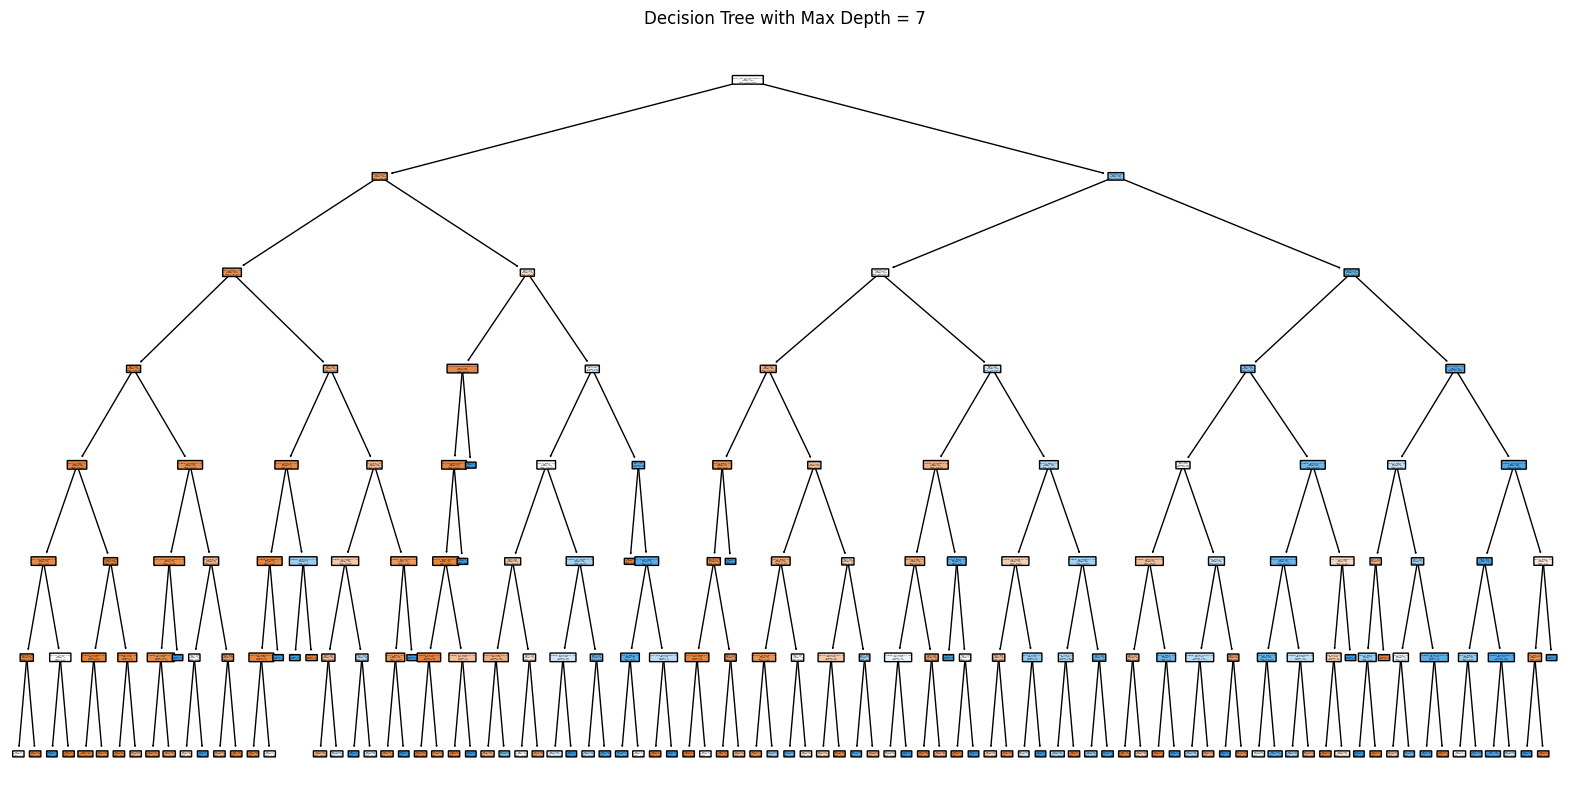

Prediction for first test instance: <=50K (True Label: <=50K)


C:\Users\ziadw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.tree import plot_tree
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    dt = DecisionTreeClassifier(max_depth=7, random_state=0)
    dt.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, dt.predict(X_train))
    print(f"Training Accuracy with max depth=7: {train_accuracy:.4f}")
    test_accuracy = accuracy_score(y_test, dt.predict(X_test))
    print(f"Testing Accuracy with max depth=7: {test_accuracy:.4f}")
    plt.figure(figsize=(20, 10))
    plot_tree(dt, feature_names=X_train.columns, class_names=['<=50K', '>50K'], filled=True, rounded=True)
    plt.title("Decision Tree with Max Depth = 7")
    plt.show()

    # Step 3: Predict the first testing instance and explain the path
    instance = X_test.iloc[0]
    prediction = dt.predict([instance])[0]
    true_label = y_test.iloc[0]
    print(f"Prediction for first test instance: {prediction} (True Label: {true_label})")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

- **(g)** What seem to be the most important features? Check out the feature importances given by the sklearn model from **(f)**. Do they agree with your guess? How are these feature importances calculated? Hint: feature importances are given by `dt.feature_importances_`

In [30]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    importances = dt.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    })
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("Feature Importances:")
    print(feature_importance_df)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Feature Importances:
                                  Feature  Importance
13     marital_status_ Married-civ-spouse    0.540809
1                               education    0.231763
0                                     age    0.107456
2                          hours_per_week    0.053072
21            occupation_ Exec-managerial    0.013170
25              occupation_ Other-service    0.006689
37                            sex_ Female    0.005663
27             occupation_ Prof-specialty    0.005387
8             workclass_ Self-emp-not-inc    0.005203
22            occupation_ Farming-fishing    0.003976
6                      workclass_ Private    0.003147
12      marital_status_ Married-AF-spouse    0.002746
23          occupation_ Handlers-cleaners    0.002571
35                            race_ Other    0.002129
7                 workclass_ Self-emp-inc    0.002105
28            occupation_ Protective-serv    0.001988
31           occupation_ Transport-moving    0.001930
34     

**<font color='purple'>Answer to (g):</font>**

**Most Important Features:**

marital_status_ Married-civ-spouse: Importance = 54.08%
education: Importance = 23.18%
age: Importance = 10.75%

**Agree with Your Guess?**

Yes, these features align with expectations, as marital status, 
education, and age are strong predictors of income levels.

**How Calculated?**

Feature importances are calculated based on the reduction in impurity (Gini or Entropy) a feature contributes across all splits. The more a feature reduces impurity, the higher its importance score.

 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>